In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import ipywidgets as widgets
from IPython.display import display, HTML

In [ ]:
# # Define the objective function to be optimized
# def objective_function(x):
#     # Example objective function (you can replace it with your own)
#     return sum(x**2)

# # Define parameters
# num_dimensions_slider = widgets.IntSlider(value=10, min=1, max=20, step=1, description='Dimensions:')
# num_whales_slider = widgets.IntSlider(value=20, min=5, max=500, step=5, description='Whales:')
# max_iterations_slider = widgets.IntSlider(value=100, min=50, max=500, step=50, description='Iterations:')
# mutation_rate_slider = widgets.FloatSlider(value=0.1, min=0.01, max=0.5, step=0.01, description='Mutation Rate:')

# button = widgets.Button(description='Start Optimization')

# # Initialize best_solution outside the function
# best_solution = None

# def update_plot(num_iterations, num_dimensions, num_whales, max_iterations, mutation_rate, best_solution):
    
#     # Initialize whale population
#     whales_position = np.random.uniform(-10, 10, (num_whales, num_dimensions))
    
#     def animate(frame):
#         nonlocal best_solution
#         ax.clear()
        
#         a = 2 - frame * (2 / max_iterations)  # Parameter a decreases linearly from 2 to 0

#         for i in range(num_whales):
#             r1 = np.random.random()  # Random number [0, 1)
#             r2 = np.random.random()  # Random number [0, 1)

#             A = 2 * a * r1 - a  # Parameter A
#             C = 2 * r2          # Parameter C

#             p = np.random.random()  # Random number [0, 1)

#             # Update position of the current whale
#             if p < 0.5:
#                 if np.abs(A) < 1:
#                     new_position = np.clip(whales_position[i] + A * np.random.normal(0, 1, num_dimensions), -10, 10)
#                 else:
#                     random_whale_index = np.random.randint(0, num_whales)
#                     new_position = np.clip(whales_position[i] + A * (whales_position[random_whale_index] - whales_position[i]) + np.random.normal(0, 1, num_dimensions), -10, 10)
#             else:
#                 # Apply genetic mutation (e.g., Gaussian mutation)
#                 new_position = np.clip(whales_position[i] + mutation_rate * np.random.normal(0, 1, num_dimensions), -10, 10)
                
#             # Update the best solution
#             if best_solution is None or objective_function(new_position) < objective_function(best_solution):
#                 best_solution = new_position

#             # Evaluate fitness of the new position
#             new_fitness = objective_function(new_position)

#             # Update position and fitness of the whale if the new position is better
#             if new_fitness < objective_function(whales_position[i]):
#                 whales_position[i] = new_position

#         ax.scatter(whales_position[:, 0], whales_position[:, 1], color='blue')
#         ax.scatter(best_solution[0], best_solution[1], color='red', marker='x')
#         ax.set_xlim(-10, 10)
#         ax.set_ylim(-10, 10)
#         ax.set_title('Iteration: {}'.format(frame))
        
#     fig, ax = plt.subplots()
#     anim = FuncAnimation(fig, animate, frames=max_iterations, repeat=False)
#     plt.close(fig)
#     return anim

# def start_optimization(button):
#     num_dimensions = num_dimensions_slider.value
#     num_whales = num_whales_slider.value
#     max_iterations = max_iterations_slider.value
#     mutation_rate = mutation_rate_slider.value
    
#     global anim
#     anim = update_plot(max_iterations, num_dimensions, num_whales, max_iterations, mutation_rate, best_solution)
#     display(HTML(anim.to_html5_video()))

# button.on_click(start_optimization)
# display(num_dimensions_slider, num_whales_slider, max_iterations_slider, mutation_rate_slider, button)

In [4]:
import numpy as np

# Define the objective function to be optimized
def objective_function(x):
    """
    Objective function to be optimized.
    Here, we use the sphere function: f(x) = sum(x**2)
    
    Parameters:
    x (numpy.ndarray): Input vector
    
    Returns:
    float: Objective function value\
    """
    if isinstance(x, np.ndarray):
        return np.sum(x**2)
    else:
        return x**2

def whale_optimization_algorithm(objective_function, num_dimensions, num_whales, max_iterations, lb, ub):
    """
    Implementation of the Whale Optimization Algorithm (WOA).
    
    Parameters:
    objective_function (function): The objective function to be optimized.
    num_dimensions (int): Number of dimensions for the search space.
    num_whales (int): Number of whales in the population.
    max_iterations (int): Maximum number of iterations.
    lb (float): Lower bound of the search space.
    ub (float): Upper bound of the search space.
    
    Returns:
    numpy.ndarray: Best solution found by the algorithm.
    float: Best fitness value.
    """
    # Initialize whale population
    whales_position = np.random.uniform(lb, ub, (num_whales, num_dimensions))

    # Main loop
    for iteration in range(max_iterations):
        a = 2 - iteration * (2 / max_iterations)  # Parameter a decreases linearly from 2 to 0
        for i in range(num_whales):
            # Update position of the current whale towards the leader whale
            A = 2 * a * np.random.random() - a  # Parameter A
            C = 2 * np.random.random()          # Parameter C

            p = np.random.random()              # Random number [0, 1)

            if p < 0.5:
                if np.abs(A) < 1:
                    new_position = np.clip(whales_position[i] + A * (whales_position[np.random.randint(num_whales)] - whales_position[i]), lb, ub)
                else:
                    random_whale_index = np.random.randint(num_whales)
                    new_position = np.clip(whales_position[i] + A * (whales_position[random_whale_index] - whales_position[i]) + C * (whales_position[random_whale_index] - whales_position[i]), lb, ub)
            else:
                new_position = np.clip(((ub - lb) * np.random.random() + lb), lb, ub)

            # Evaluate fitness of the new position
            new_fitness = objective_function(new_position)

            # Update position of the whale if the new position is better
            if new_fitness < objective_function(whales_position[i]):
                whales_position[i] = new_position

    # Find the best solution
    best_solution_index = np.argmin([objective_function(x) for x in whales_position])
    best_solution = whales_position[best_solution_index]
    best_fitness = objective_function(best_solution)

    return best_solution, best_fitness

# Define parameters
num_dimensions = 2    # Number of dimensions for the search space
num_whales = 20       # Number of whales in the population
max_iterations = 100  # Maximum number of iterations
lb = -10              # Lower bound of the search space
ub = 10               # Upper bound of the search space

# Call the Whale Optimization Algorithm function
best_solution, best_fitness = whale_optimization_algorithm(objective_function, num_dimensions, num_whales, max_iterations, lb, ub)

# Print the best solution found and its corresponding fitness value
print("Best solution:", best_solution)
print("Best fitness:", best_fitness)


Best solution: [5.04332484e-05 2.45784271e-05]
Best fitness: 3.1476116242374273e-09


Visualization of the Algorithm

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import ipywidgets as widgets
from IPython.display import display, HTML

# Define the objective function to be optimized
def objective_function(x):
    return sum(x**2)

def whale_optimization_algorithm(objective_function, num_dimensions, num_whales, max_iterations, lb, ub):
    # Initialize whales positions with random values from uniform distribution. p(x) = 1 / (ub - lb)
    whales_position = np.random.uniform(lb, ub, (num_whales, num_dimensions))
    best_solution = None
    best_fitness = float('inf')
    all_whales_positions = []  # Store positions of all whales for visualization

    for iteration in range(max_iterations):
        all_whales_positions.append(whales_position.copy())  # Store current positions for visualization
        a = 2 - 2 * iteration / max_iterations
        for i in range(num_whales):
            leader_index = np.random.randint(num_whales)
            leader_position = whales_position[leader_index]

            A = 2 * a * np.random.random() - a
            C = 2 * np.random.random()
            p = np.random.random()

            if p < 0.5:
                new_position = leader_position - A * np.abs(C * leader_position - whales_position[i])
            else:
                random_whale_index = np.random.randint(num_whales)
                D = np.abs(leader_position - whales_position[random_whale_index])
                new_position = D * np.exp(0.1 * A) * np.cos(2 * np.pi * A) + leader_position

            new_position = np.clip(new_position, lb, ub)
            fitness = objective_function(new_position)

            if fitness < best_fitness:
                best_solution = new_position
                best_fitness = fitness

            if fitness < objective_function(whales_position[i]):
                whales_position[i] = new_position

    return best_solution, best_fitness, all_whales_positions

# Define animation update function
def update_plot(num_dimensions, num_whales, max_iterations, mutation_rate):
    lb = -10
    ub = 10
    best_solution, best_fitness, all_whales_positions = whale_optimization_algorithm(objective_function, num_dimensions, num_whales, max_iterations, lb, ub)
    print("Best solution:", best_solution)
    print("Best fitness:", best_fitness)
    print("\nDimensions:", num_dimensions)
    print("Whales:", num_whales)
    print("Iterations:", max_iterations)
    
    # Plotting
    fig, ax = plt.subplots()
    ax.set_xlim(lb, ub)
    ax.set_ylim(lb, ub)
    ax.set_title("Whale Optimization Algorithm")

    # Animation function
    def animate(frame):
        ax.clear()
        ax.set_xlim(lb, ub)
        ax.set_ylim(lb, ub)
        ax.set_title("Whale Optimization Algorithm - Iteration {}".format(frame))
        ax.scatter(all_whales_positions[frame][:, 0], all_whales_positions[frame][:, 1], color='blue', label='Whales')
        ax.scatter(best_solution[0], best_solution[1], color='red', label='Best Solution')
        ax.legend()

    # Create animation
    anim = FuncAnimation(fig, animate, frames=len(all_whales_positions), repeat=False)
    plt.close()  # Prevents double plotting in Jupyter notebook
    display(HTML(anim.to_html5_video()))

# Create interactive sliders and button
num_dimensions_slider = widgets.IntSlider(value=10, min=1, max=20, step=1, description='Dimensions:')
num_whales_slider = widgets.IntSlider(value=20, min=5, max=50, step=5, description='Whales:')
max_iterations_slider = widgets.IntSlider(value=100, min=50, max=500, step=50, description='Iterations:')
mutation_rate_slider = widgets.FloatSlider(value=0.1, min=0.01, max=0.5, step=0.01, description='Mutation Rate:')
button = widgets.Button(description='Start Optimization')

# Define button click event handler
def on_button_click(button):
    update_plot(num_dimensions_slider.value, num_whales_slider.value, max_iterations_slider.value, mutation_rate_slider.value)

# Attach event handler to the button click event
button.on_click(on_button_click)

# Display widgets
display(num_dimensions_slider, num_whales_slider, max_iterations_slider, mutation_rate_slider, button)


IntSlider(value=10, description='Dimensions:', max=20, min=1)

IntSlider(value=20, description='Whales:', max=50, min=5, step=5)

IntSlider(value=100, description='Iterations:', max=500, min=50, step=50)

FloatSlider(value=0.1, description='Mutation Rate:', max=0.5, min=0.01, step=0.01)

Button(description='Start Optimization', style=ButtonStyle())

Best solution: [-0.00099015  0.00018041  0.00021535 -0.00028027 -0.00098557 -0.00021965
  0.00060153  0.0012355   0.00099525  0.00057254]
Best fitness: 5.364079465105938e-06

Dimensions: 10
Whales: 20
Iterations: 100


SensorNode Class with following attributes and methods.

In [2]:
import numpy as np

class SensorNode:
    def __init__(self, x, y, initial_energy):
        self.x = x  
        self.y = y  
        self.energy = initial_energy  
        self.color = self.get_color()  
        self.alive = True if initial_energy > 0 else False

    def get_color(self):
        if self.energy < 0.25:
            return 'red'  
        elif self.energy < 0.5:
            return 'orange'  
        else:
            return 'green'  
    
    def update_energy(self, m, d, E_fs, E_mp, d_T):
        # Update energy of the node based on the energy dissipation formula
        if self.energy > 0:
            if d <= d_T:
                # Free space energy dissipation model
                self.energy -= m * E_fs * d**2
            else:
                # Multipath energy dissipation model
                self.energy -= m * E_mp * d**4
                
            if self.energy <= 0:
                self.energy = 0
                self.alive = False
                self.color = 'grey'  # Node is dead, color it grey
            else:
                self.color = self.get_color()  # Update color based on new energy level
    
    def calculate_distance(self, x, y):
        return np.sqrt((self.x - x)**2 + (self.y - y)**2)
    

# Define Cluster 
class Cluster:
    def __init__(self, cluster_head):
        self.cluster_head = cluster_head
        self.members = []
    
        


Helper Functions

In [3]:
def calculateDistance(node1, node2):
    return np.sqrt((node1.x - node2.x)**2 + (node1.y - node2.y)**2)





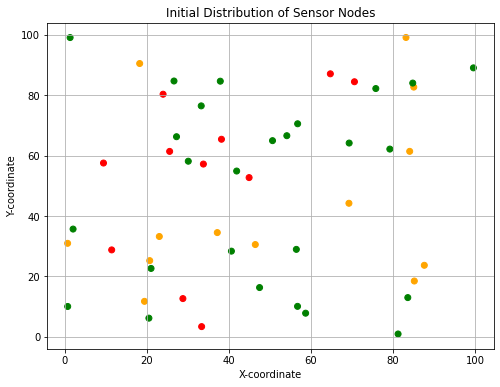

In [4]:
import matplotlib.pyplot as plt
import numpy as np



# Initialize sensor nodes
num_nodes = 50  # Number of sensor nodes
initial_energy = np.random.uniform(0.1, 1.0, num_nodes)  # Initial energy level for all nodes
nodes = [SensorNode(np.random.uniform(0, 100), np.random.uniform(0, 100), initial_energy[i]) for i in range(num_nodes)]

# Visualize input parameters
plt.figure(figsize=(8, 6))
plt.scatter([node.x for node in nodes], [node.y for node in nodes], c=[node.color for node in nodes])
plt.title('Initial Distribution of Sensor Nodes')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.grid(True)
plt.show()

# Apply WOA for cluster formation
# Implement WOA algorithm here


Objective Function

In [11]:
def objectiveFunction(m = 1, E_b = 50 * (10^-9), E_fs = 10 * (10 ^ -12), E_mp = 0.0013 * (10^-9), E_A = 5 * (10^-9), d_T = 75, start = None, end = None):
    """
        Arguments:
            m: no. of bits to be transmitted, 
            E_b: Energy required to transmit single bit, 
            E_fs: Energy dissipated in free space model, 
            E_mp: Energy dissipated in multi-path model, 
            E_A: Energy dissipated while aggregation of bits in CH, 
            d_T: Threshold distance to decide which model to take (freespace or multipath), 
            cluster_nodes: cluster nodes of each cluster, 
            controller: SD-WSN based controller.
        Return:
            Node with minimum fitness value.
    """
    d = calculateDistance(start, end)
    d_T = np.sqrt(E_fs/E_mp)
    E_TX_SD_SN = m * E_b + m*E_fs * d**2 if d <= d_T else m * E_b + m*E_mp * d**4
    E_TX_CN = m * (E_A + E_b) + m*E_fs * d**2 if d <= d_T else m * (E_A + E_b) + m*E_mp * d**4
    energy_fitness = (E_TX_CN / E_TX_SD_SN) + E_A
    return energy_fitness    

Cluster formation MAIN

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


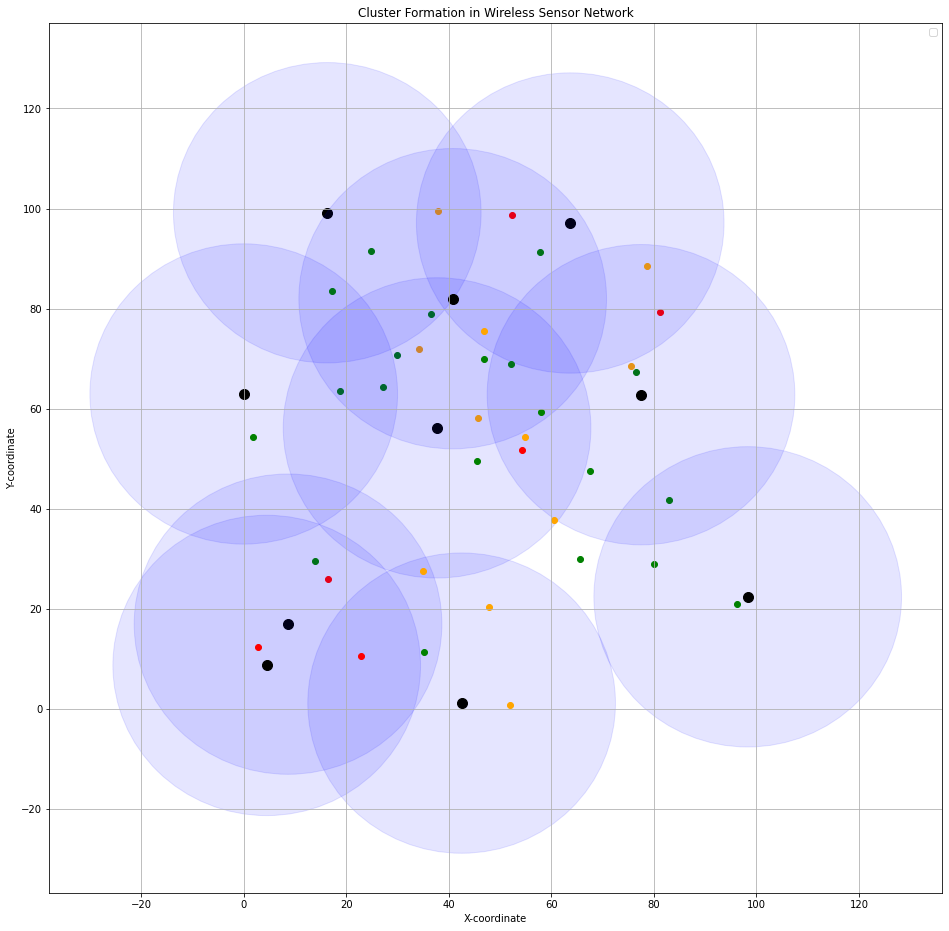

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


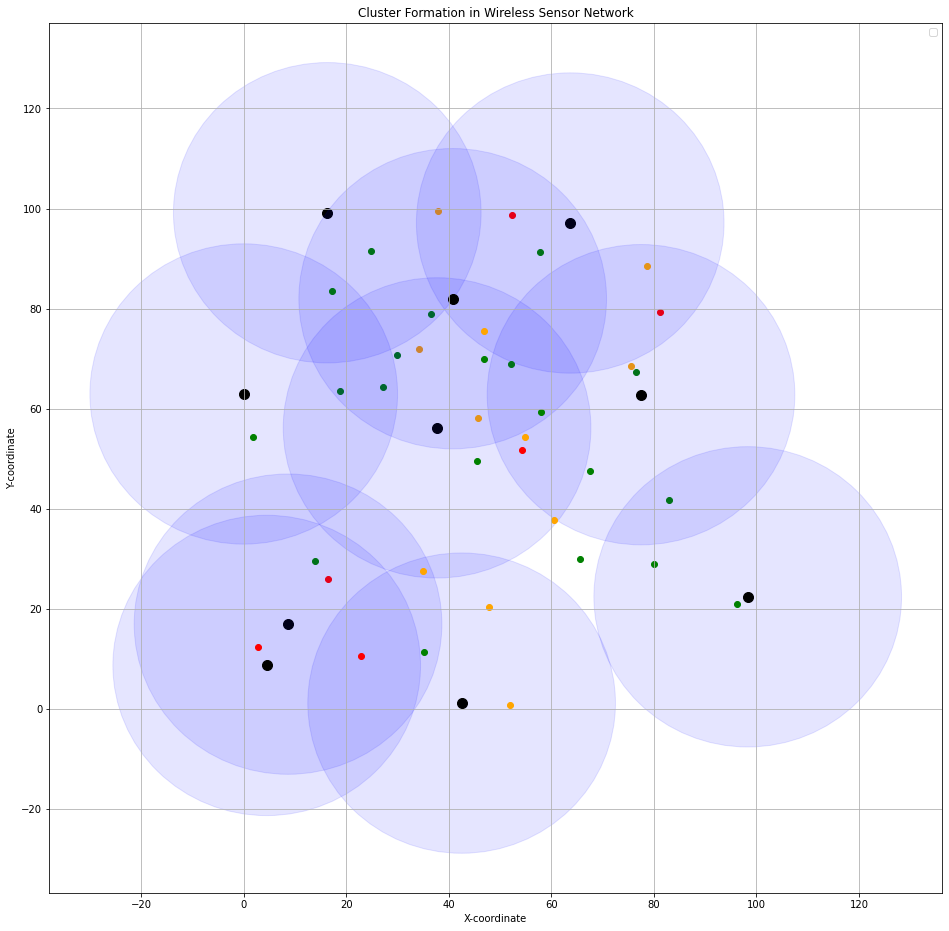

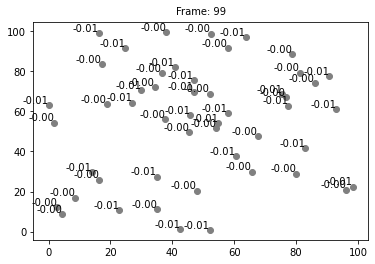

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.animation import FuncAnimation
from IPython.display import display, HTML


class SensorNode:
    def __init__(self, x, y, initial_energy):
        self.x = x
        self.y = y
        self.initial_energy = initial_energy
        self.energy = initial_energy
        self.color = self.get_color()
        self.is_cluster_head = False

    def get_color(self):
        if self.energy <= 0:
            return 'gray'
        elif self.energy < 0.25:
            return 'red'
        elif self.energy < 0.5:
            return 'orange'
        elif self.energy > 0:
            return 'green'
            
    
class Controller:
    def __init__(self, x = 50, y = 50) -> None:
        self.x = x
        self.y = y

class Cluster:
    def __init__(self, cluster_head):
        self.cluster_head = cluster_head
        self.members = []

def initialize_sensor_nodes(num_nodes):
    return [SensorNode(np.random.uniform(0, 100), np.random.uniform(0, 100), np.random.uniform(0.1, 1.0)) for _ in range(num_nodes)]

def calculate_distance(node1, node2):
    return np.sqrt((node1.x - node2.x)**2 + (node1.y - node2.y)**2)

def select_cluster_heads(nodes, num_clusters):
    # Implement WOA 
    return np.random.choice(nodes, num_clusters, replace=False)

def form_clusters(nodes, cluster_heads, cluster_radius):
    clusters = [Cluster(head) for head in cluster_heads]
    for node in nodes:
        nearest_cluster_head = min(cluster_heads, key=lambda head: calculate_distance(node, head))
        if calculate_distance(node, nearest_cluster_head) <= cluster_radius:
            nearest_cluster = next(cluster for cluster in clusters if cluster.cluster_head == nearest_cluster_head)
            nearest_cluster.members.append(node)
    return clusters

def visualize_clusters(nodes, clusters, cluster_radius):
    plt.figure(figsize=(16, 16))
    for cluster in clusters:
        cluster_head = cluster.cluster_head
        cluster_x, cluster_y = cluster_head.x, cluster_head.y
        plt.scatter(cluster_x, cluster_y, color='blue')
        circle = Circle((cluster_x, cluster_y), cluster_radius, color='blue', alpha=0.1)
        plt.gca().add_patch(circle)
        for member in cluster.members:
            plt.scatter(member.x, member.y, color=member.color)
        plt.scatter(cluster_head.x, cluster_head.y, s = 100,color='black')
    plt.title('Cluster Formation in Wireless Sensor Network')
    plt.xlabel('X-coordinate')
    plt.ylabel('Y-coordinate')
    plt.grid(True)
    plt.legend()
    plt.show()

def update_energy(nodes):
    # Update energy levels of nodes based on data transmission and other activities
    for node in nodes:
        if node.energy <= 0:
            node.color = 'gray'
            continue
        if node.is_cluster_head:
            node.energy -= 0.1
        else:
            node.energy -= 0.01  # Placeholder for energy update logic
        

# Define parameters
num_nodes = 50
num_clusters = 10
cluster_radius = 30

# Initialize sensor nodes
nodes = initialize_sensor_nodes(num_nodes)

# Select cluster heads
cluster_heads = select_cluster_heads(nodes, num_clusters)

# Form clusters
clusters = form_clusters(nodes, cluster_heads, cluster_radius)
i = 0
controller = Controller(50, 50)
for cluster in clusters:
    res = float("inf")
    num_nodes = len(cluster.members)
    for start in range(num_nodes):
        fitness_val = objectiveFunction(start = cluster.members[start], end = controller)
        if fitness_val < res:
            cluster.cluster_head = cluster.members[start]
            res = fitness_val
    # cluster.cluster_head.is_cluster_head = True
    



# VERIFIED BY @suruchi
# res = [float("inf"), None]
# for start in range(num_nodes):
#     fitness_val = objectiveFunction(start = cluster_nodes[start], end = controller)
#     if fitness_val < res[0]:
#         res = [fitness_val, cluster_nodes[start]]

# Visualize clusters
visualize_clusters(nodes, clusters, cluster_radius)
# print("Before")
# for cluster in clusters:
#     for node in cluster.members:
#         print(node.initial_energy)

# Update energy levels and visualize again (repeat as needed)
update_energy(nodes)
visualize_clusters(nodes, clusters, cluster_radius)
# VERIFIED BY @suruchi
# print("After")
# for cluster in clusters:
#     for node in cluster.members:
#         print(node.energy)
def update(frame):
    update_energy(nodes)
    for i, scatter in enumerate(scatters):
        # if nodes[i].is_cluster_head:
            # plt.scatter(nodes[i].x, nodes[i].y, s = 100,color='black')
        scatter.set_color(nodes[i].get_color())
        energy_texts[i].set_text(f'{nodes[i].energy:.2f}')
    frame_text.set_text(f'Frame: {frame}')
    return scatters + energy_texts

scatters = [plt.scatter(node.x, node.y, color=node.color) for node in nodes]
energy_texts = [plt.text(node.x, node.y, f'{node.energy:.2f}', ha='right', va='bottom') for node in nodes]
frame_text = plt.text(0.5, 1.05, '', transform=plt.gca().transAxes, ha='center', va='center')
ani = FuncAnimation(plt.gcf(), update, interval=500)
display(HTML(ani.to_html5_video()))


plt.show()

x	y	energy
17.6929536928787 80.9834253936968 0.3193517573687852
64.1656198387596 59.757632587971585 0.528765105938575
73.67855274461256 79.80908286068198 0.1552749478344895
6.9587432694753755 92.41622001807545 0.9544192196386904
87.32319273864537 87.18260782175153 0.206876127852769
10.633668363129045 6.364234788233436 0.9114517816573081
20.131546390388312 26.682174004844505 0.6063265004597168
63.32195872409838 99.26454202576376 0.29967602184314457
92.18278998561442 19.57471149049067 0.4333920627157919
10.942322006104387 61.98169976313446 0.8368458716633698
Minimal Fitness Value: -13.99979503635449, 
Optimal Node Coordinates(x, y): (6.9587432694753755, 92.41622001807545), Energy: 0.9544192196386904


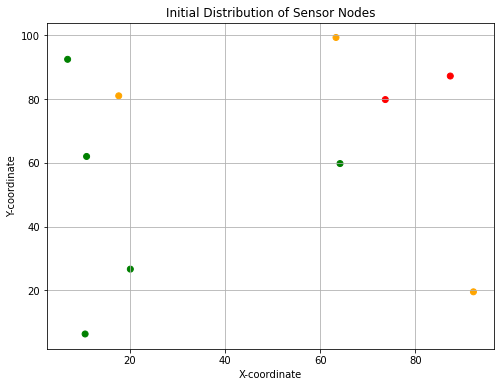

In [14]:
num_nodes = 10
controller = Controller(50, 50)
cluster_nodes = [SensorNode(np.random.uniform(0, 100), np.random.uniform(0, 100), np.random.uniform(0.1, 1.0)) for _ in range(num_nodes)]
print("x\ty\tenergy")
for node in cluster_nodes:
    print(node.x, node.y, node.initial_energy)
res = [float("inf"), None]
for start in range(num_nodes):
    fitness_val = objectiveFunction(start = cluster_nodes[start], end = controller)
    if fitness_val < res[0]:
        res = [fitness_val, cluster_nodes[start]]
print(f"Minimal Fitness Value: {res[0]}, \nOptimal Node Coordinates(x, y): ({res[1].x}, {res[1].y}), Energy: {res[1].initial_energy}")

plt.figure(figsize=(8, 6))
plt.scatter([node.x for node in cluster_nodes], [node.y for node in cluster_nodes], c=[node.color for node in cluster_nodes])
plt.title('Initial Distribution of Sensor Nodes')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.grid(True)
plt.show()


